In [1]:
s3_public_path = "s3://mads-508-public-dataset/PollutionProject/"
%store s3_public_path

Stored 's3_public_path' (str)


In [2]:
import sagemaker
session = sagemaker.Session()

# Define private bucket for each user
s3_private_path = f"s3://{session.default_bucket()}/PollutionProject/"
print(s3_private_path)

%store s3_private_path

/opt/conda/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
s3://sagemaker-us-east-1-295335418641/PollutionProject/
Stored 's3_private_path' (str)


In [3]:
!aws s3 cp --recursive $s3_public_path $s3_private_path

fatal error: An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [4]:
print(s3_private_path)
!aws s3 ls $s3_private_path

s3://sagemaker-us-east-1-295335418641/PollutionProject/
                           PRE updated/
2025-03-25 01:18:39      14494 Urban_Traffic_Data.csv
2025-03-25 01:18:39    1630831 global air pollution dataset.csv
2025-03-25 01:18:39     787786 global_air_quality_data_10000.csv
2025-03-25 01:18:39     152263 test.csv
2025-03-25 01:18:39     354908 train.csv


In [5]:
import os
import boto3

# Define local directory
local_data_dir = "./data/"
os.makedirs(local_data_dir, exist_ok=True)

# Initialize S3 client
s3_client = boto3.client("s3")

# Download files from private S3 bucket
response = s3_client.list_objects_v2(Bucket=session.default_bucket(), Prefix="PollutionProject/")

if "Contents" in response:
    for obj in response["Contents"]:
        s3_file = obj["Key"]
        local_file = os.path.join(local_data_dir, os.path.basename(s3_file))
        s3_client.download_file(session.default_bucket(), s3_file, local_file)
        print(f"Downloaded {s3_file} to {local_file}")
else:
    print("No files found in private bucket.")

Downloaded PollutionProject/Urban_Traffic_Data.csv to ./data/Urban_Traffic_Data.csv
Downloaded PollutionProject/global air pollution dataset.csv to ./data/global air pollution dataset.csv
Downloaded PollutionProject/global_air_quality_data_10000.csv to ./data/global_air_quality_data_10000.csv
Downloaded PollutionProject/test.csv to ./data/test.csv
Downloaded PollutionProject/train.csv to ./data/train.csv
Downloaded PollutionProject/updated/Air_Quality_Data_Updated.csv to ./data/Air_Quality_Data_Updated.csv
Downloaded PollutionProject/updated/Urban_Traffic_Data_Updated.csv to ./data/Urban_Traffic_Data_Updated.csv


In [6]:
import pandas as pd

# Load CSV files
pollution_data = pd.read_csv('./data/global air pollution dataset.csv')
air_quality_data = pd.read_csv('./data/global_air_quality_data_10000.csv')
traffic_data = pd.read_csv('./data/Urban_Traffic_Data.csv')

# Display first few rows
print("Pollution Data:")
display(pollution_data.head())

print("Air Quality Data:")
display(air_quality_data.head())

print("Traffic Data:")
display(traffic_data.head())

Pollution Data:


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


Air Quality Data:


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


Traffic Data:


,City,Year,Average_Daily_Traffic_Counts,Peak_Hourly_Traffic_Volume,Percentage_of_Commercial_Vehicles,Number_of_Road_Accidents,Average_Traffic_Speed_kmh,Air_Quality_Index,Population_Million
0,New York,2015,19967,4705,15.3,159,30.7,113,11.24
1,London,2015,22128,3408,15.4,609,71.7,85,12.37
2,Tokyo,2015,44738,2017,9.1,775,52.3,53,11.97
3,Mumbai,2015,38295,4140,19.2,614,72.7,72,10.55
4,Sydney,2015,30337,4654,14.9,114,29.1,74,7.16


In [7]:
print("Pollution Data Summary:")
display(pollution_data.describe())

print("Air Quality Data Summary:")
display(air_quality_data.describe())

print("Traffic Data Summary:")
display(traffic_data.describe())

Pollution Data Summary:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Air Quality Data Summary:


,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


Traffic Data Summary:


,Year,Average_Daily_Traffic_Counts,Peak_Hourly_Traffic_Volume,Percentage_of_Commercial_Vehicles,Number_of_Road_Accidents,Average_Traffic_Speed_kmh,Air_Quality_Index,Population_Million
count,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2019.50000,29655.313333,2972.856667,21.151000,562.616667,50.828000,99.010000,7.947133
std,2.87708,11360.483090,1159.243400,9.544409,272.472188,17.596973,27.763512,4.066140
min,2015.00000,10029.000000,1005.000000,5.100000,104.000000,20.500000,50.000000,1.020000
25%,2017.00000,20790.250000,1964.250000,12.600000,315.750000,34.575000,74.000000,4.117500
50%,2019.50000,29401.000000,3052.000000,20.750000,573.500000,52.100000,99.000000,8.055000
75%,2022.00000,39997.750000,3911.750000,29.150000,803.250000,66.575000,122.000000,11.457500
max,2024.00000,49935.000000,4999.000000,39.900000,996.000000,79.900000,149.000000,14.990000


In [8]:
print("Missing Values in Pollution Data:")
display(pollution_data.isnull().sum())

print("Missing Values in Air Quality Data:")
display(air_quality_data.isnull().sum())

print("Missing Values in Traffic Data:")
display(traffic_data.isnull().sum())

Missing Values in Pollution Data:


Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Missing Values in Air Quality Data:


City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

Missing Values in Traffic Data:


City                                 0
Year                                 0
Average_Daily_Traffic_Counts         0
Peak_Hourly_Traffic_Volume           0
Percentage_of_Commercial_Vehicles    0
Number_of_Road_Accidents             0
Average_Traffic_Speed_kmh            0
Air_Quality_Index                    0
Population_Million                   0
dtype: int64

In [9]:
print("Pollution Data Types:")
display(pollution_data.dtypes)

print("Air Quality Data Types:")
display(air_quality_data.dtypes)

print("Traffic Data Types:")
display(traffic_data.dtypes)

Pollution Data Types:


Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

Air Quality Data Types:


City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object

Traffic Data Types:


City                                  object
Year                                   int64
Average_Daily_Traffic_Counts           int64
Peak_Hourly_Traffic_Volume             int64
Percentage_of_Commercial_Vehicles    float64
Number_of_Road_Accidents               int64
Average_Traffic_Speed_kmh            float64
Air_Quality_Index                      int64
Population_Million                   float64
dtype: object

[03/25/25 01:22:32] INFO     generated new fontManager                                         ]8;id=705116;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560214;file:///opt/conda/lib/python3.11/site-packages/matplotlib/font_manager.py#1639\1639]8;;\

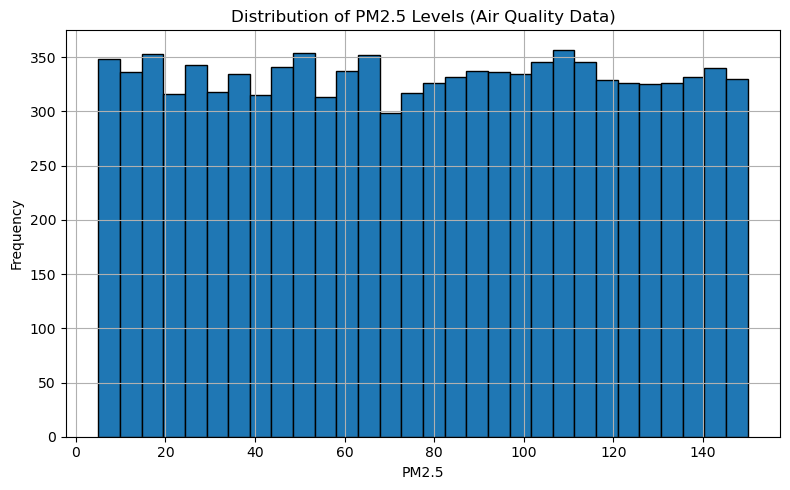

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of PM2.5 from Air Quality Data
plt.figure(figsize=(8, 5))
plt.hist(air_quality_data['PM2.5'], bins=30, edgecolor='black')
plt.title("Distribution of PM2.5 Levels (Air Quality Data)")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

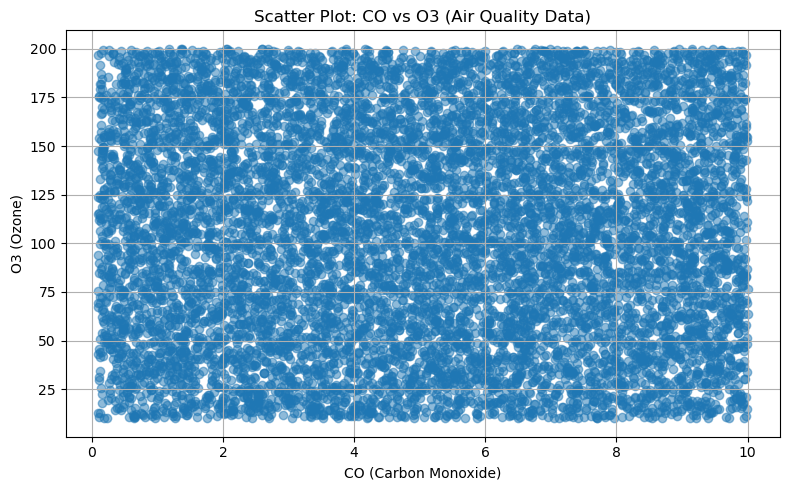

In [11]:
# Scatter Plot: CO vs O3 (Air Quality Data)
plt.figure(figsize=(8, 5))
plt.scatter(air_quality_data["CO"], air_quality_data["O3"], alpha=0.5)
plt.title("Scatter Plot: CO vs O3 (Air Quality Data)")
plt.xlabel("CO (Carbon Monoxide)")
plt.ylabel("O3 (Ozone)")
plt.grid(True)
plt.tight_layout()
plt.show()

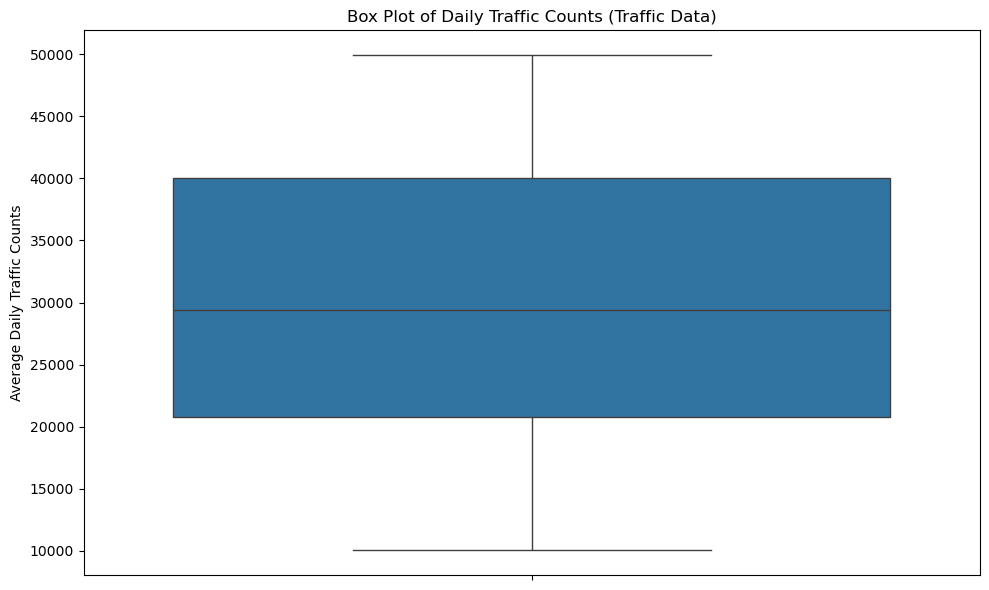

In [12]:
# Box Plot: Average Daily Traffic Counts (Traffic Data)
plt.figure(figsize=(10, 6))
sns.boxplot(y=traffic_data["Average_Daily_Traffic_Counts"])
plt.title("Box Plot of Daily Traffic Counts (Traffic Data)")
plt.ylabel("Average Daily Traffic Counts")
plt.tight_layout()
plt.show()

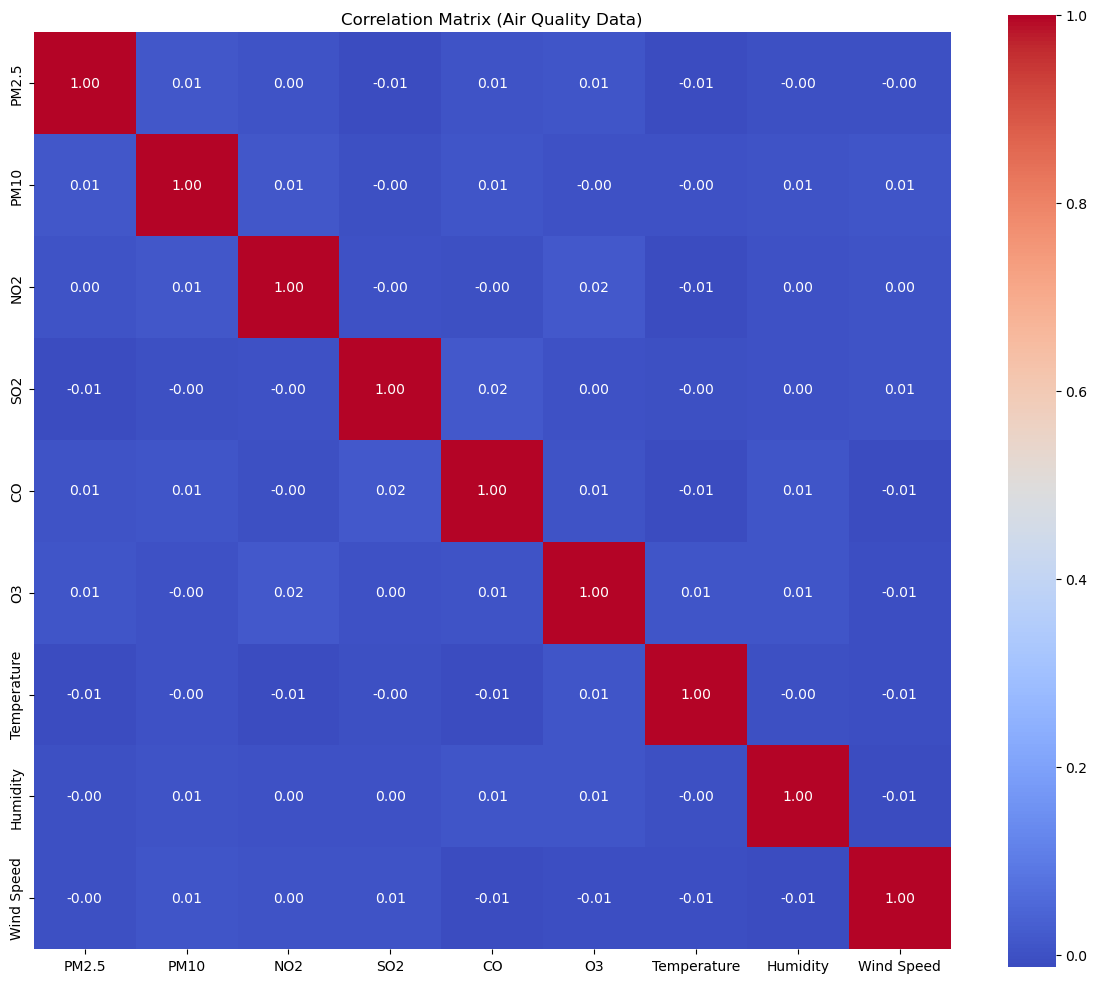

In [13]:
# Correlation Matrix Heatmap for Air Quality Data
plt.figure(figsize=(12, 10))
aq_numeric = air_quality_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = aq_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Air Quality Data)")
plt.tight_layout()
plt.show()

In [14]:
# Define the local path for the traffic data
traffic_file = os.path.join(local_data_dir, "Urban_Traffic_Data.csv")

# Define the path for updated data
filtered_data_dir = "./filtered_data/"
os.makedirs(filtered_data_dir, exist_ok=True)

if os.path.exists(traffic_file):
    # Load traffic data
    traffic_data = pd.read_csv(traffic_file)

    # Define a dictionary mapping cities to their respective countries
    city_to_country = {
        "New York": "United States",
        "London": "United Kingdom",
        "Tokyo": "Japan",
        "Mumbai": "India",
        "Sydney": "Australia",
        "Cairo": "Egypt",
        "Sao Paulo": "Brazil",
        "Shanghai": "China",
        "Los Angeles": "United States",
        "Paris": "France",
        "Moscow": "Russia",
        "Istanbul": "Turkey",
        "Jakarta": "Indonesia",
        "Seoul": "South Korea",
        "Mexico City": "Mexico",
        "Lima": "Peru",
        "Bangkok": "Thailand",
        "Beijing": "China",
        "Karachi": "Pakistan",
        "Buenos Aires": "Argentina",
        "Tehran": "Iran",
        "Hong Kong": "China",
        "Baghdad": "Iraq",
        "Toronto": "Canada",
        "Kuala Lumpur": "Malaysia",
        "Santiago": "Chile",
        "Dallas": "United States",
        "Madrid": "Spain",
        "Berlin": "Germany",
        "Johannesburg": "South Africa"
    }

    # Add the "Country" column based on city mapping
    traffic_data["Country"] = traffic_data["City"].map(city_to_country)
    traffic_data["Country"] = traffic_data["Country"].fillna("Unknown")

    # Define the path for the updated traffic data file
    updated_file_path = os.path.join(filtered_data_dir, "Urban_Traffic_Data_Updated.csv")

    # Save locally
    traffic_data.to_csv(updated_file_path, index=False)
    print(f"Updated traffic data saved to {updated_file_path}")

    # Upload to the correct team bucket
    s3 = boto3.client("s3")
    team_bucket = "mads-508-public-dataset"
    s3_key = "PollutionProject/updated/Urban_Traffic_Data_Updated.csv"

    s3.upload_file(updated_file_path, team_bucket, s3_key)
    print(f"✅ Uploaded updated traffic data to s3://{team_bucket}/{s3_key}")

else:
    print("🚫 Traffic data file not found.")

Updated traffic data saved to ./filtered_data/Urban_Traffic_Data_Updated.csv
✅ Uploaded updated traffic data to s3://mads-508-public-dataset/PollutionProject/updated/Urban_Traffic_Data_Updated.csv


In [15]:
# Verify the Country Column has been added
print("Traffic Data Summary:")
display(traffic_data.head())

Traffic Data Summary:


,City,Year,Average_Daily_Traffic_Counts,Peak_Hourly_Traffic_Volume,Percentage_of_Commercial_Vehicles,Number_of_Road_Accidents,Average_Traffic_Speed_kmh,Air_Quality_Index,Population_Million,Country
0,New York,2015,19967,4705,15.3,159,30.7,113,11.24,United States
1,London,2015,22128,3408,15.4,609,71.7,85,12.37,United Kingdom
2,Tokyo,2015,44738,2017,9.1,775,52.3,53,11.97,Japan
3,Mumbai,2015,38295,4140,19.2,614,72.7,72,10.55,India
4,Sydney,2015,30337,4654,14.9,114,29.1,74,7.16,Australia


In [16]:
# Remove missing values (extremely small percentage of row data)
pollution_data = pollution_data.dropna()

print("Missing Values in Pollution Data After Drop:")
display(pollution_data.isnull().sum())

Missing Values in Pollution Data After Drop:


Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [17]:
# Load datasets
pollution_data = pd.read_csv("./data/global air pollution dataset.csv")
air_quality_data = pd.read_csv("./data/global_air_quality_data_10000.csv")
traffic_df = pd.read_csv("./data/Urban_Traffic_Data_Updated.csv")

In [18]:
# Keep air quality data as-is
air_quality_df = air_quality_data.copy()

# Check for true duplicate rows in traffic and AQI datasets
traffic_df = traffic_df.drop_duplicates(subset="City")
pollution_data = pollution_data.drop_duplicates(subset="City")

# Merge traffic features into air quality data (on 'City')
merged_df = pd.merge(air_quality_df, traffic_df, on="City", how="inner")

# Merge AQI Category (the target) into the result
merged_df = pd.merge(merged_df, pollution_data[["City", "AQI Category"]], on="City", how="inner")

In [19]:
# Check original number of rows in air_quality_data
print("Original air quality data rows:", air_quality_data.shape[0])

# Drop duplicates in lookup tables
traffic_df_unique = traffic_df.drop_duplicates(subset="City")
pollution_data_unique = pollution_data.drop_duplicates(subset="City")

# Merge 1: air_quality_data + traffic_df
merge1 = pd.merge(air_quality_data, traffic_df_unique, on="City", how="inner")
print("After merging with traffic data:", merge1.shape[0])

# Merge 2: result + pollution_data (AQI Category)
final_merged = pd.merge(merge1, pollution_data_unique[["City", "AQI Category"]], on="City", how="inner")
print("After merging with pollution data (AQI Category):", final_merged.shape[0])

# Optional: see how many unique cities were preserved
print("Unique cities in final merged dataset:", final_merged['City'].nunique())

Original air quality data rows: 10000
After merging with traffic data: 8989
After merging with pollution data (AQI Category): 7498
Unique cities in final merged dataset: 15


In [20]:
feature_columns = [
    "PM2.5", "PM10", "NO2", "SO2", "CO", "O3",
    "Average_Daily_Traffic_Counts", "Peak_Hourly_Traffic_Volume",
    "Percentage_of_Commercial_Vehicles", "Number_of_Road_Accidents",
    "Average_Traffic_Speed_kmh", "Population_Million"]

In [21]:
target_column = "AQI Category"

In [22]:
# Select features (X) and target (y)
X = final_merged[feature_columns]
y = final_merged["AQI Category"]

# Preview to confirm
print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()

Features shape: (7498, 12)
Target shape: (7498,)


,PM2.5,PM10,NO2,SO2,CO,O3,Average_Daily_Traffic_Counts,Peak_Hourly_Traffic_Volume,Percentage_of_Commercial_Vehicles,Number_of_Road_Accidents,Average_Traffic_Speed_kmh,Population_Million
0,86.57,25.19,99.88,30.63,4.46,36.29,40623,1181,20.7,925,77.6,6.28
1,50.63,97.39,48.14,8.71,3.40,144.16,19832,4103,27.1,230,42.9,3.50
2,55.20,36.62,76.85,21.85,2.00,67.09,41460,1757,10.7,634,58.9,10.71
3,121.28,196.39,86.17,28.74,2.64,46.86,41301,3932,12.3,821,68.6,5.10
4,118.76,15.69,12.99,39.05,3.04,15.75,44738,2017,9.1,775,52.3,11.97


In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the target
y_encoded = le.fit_transform(y)

# Store the mapping for later interpretation
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label mapping:")
print(label_mapping)

Label mapping:
{'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Unhealthy for Sensitive Groups': 3}


In [24]:
from sklearn.model_selection import train_test_split

# Split your features and encoded target
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded)

# Convert target arrays to Series with matching index
y_train = pd.Series(y_train, index=X_train.index, name="AQI_Category")
y_test = pd.Series(y_test, index=X_test.index, name="AQI_Category")

# Combine features and target properly
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("CSVs saved: 'train.csv' and 'test.csv'")

CSVs saved: 'train.csv' and 'test.csv'


In [25]:
# Use your confirmed team bucket and folder
bucket_name = "mads-508-public-dataset"
folder_prefix = "PollutionProject"

# Upload the corrected files
s3 = boto3.client("s3")
s3.upload_file("train.csv", bucket_name, f"{folder_prefix}/train.csv")
s3.upload_file("test.csv", bucket_name, f"{folder_prefix}/test.csv")

# Confirm S3 paths
train_s3_path = f"s3://{bucket_name}/{folder_prefix}/train.csv"
test_s3_path = f"s3://{bucket_name}/{folder_prefix}/test.csv"

# Store paths for reuse
%store train_s3_path
%store test_s3_path

print("Uploaded files to team S3 bucket:")
print("Train:", train_s3_path)
print("Test:", test_s3_path)

Stored 'train_s3_path' (str)
Stored 'test_s3_path' (str)
Uploaded files to team S3 bucket:
Train: s3://mads-508-public-dataset/PollutionProject/train.csv
Test: s3://mads-508-public-dataset/PollutionProject/test.csv


In [26]:
# Remove rows with invalid or missing labels
valid_labels = [0, 1, 2, 3]
train_df = train_df[train_df["AQI_Category"].isin(valid_labels)].dropna()
test_df = test_df[test_df["AQI_Category"].isin(valid_labels)].dropna()

# Save again
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

s3.upload_file("train.csv", bucket_name, "PollutionProject/train.csv")
s3.upload_file("test.csv", bucket_name, "PollutionProject/test.csv")

In [27]:
# Reorder columns to put AQI_Category as the first column
train_cols = train_df.columns.tolist()
test_cols = test_df.columns.tolist()

train_cols.remove("AQI_Category")
test_cols.remove("AQI_Category")

train_reordered = train_df[["AQI_Category"] + train_cols]
test_reordered = test_df[["AQI_Category"] + test_cols]

# Save without header and index for SageMaker
train_reordered.to_csv("train_sagemaker.csv", index=False, header=False)
test_reordered.to_csv("test_sagemaker.csv", index=False, header=False)

s3.upload_file("train_sagemaker.csv", "mads-508-public-dataset", "PollutionProject/train.csv")
s3.upload_file("test_sagemaker.csv", "mads-508-public-dataset", "PollutionProject/test.csv")